In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms

In [2]:
img1 = cv2.imread("./lena.jpg")

In [3]:
print("No of Channel is: " + str(img1.ndim))

No of Channel is: 3


In [4]:
img2 = cv2.imread("./pepper.jpg")

In [5]:
print("No of Channel is: " + str(img2.ndim))

No of Channel is: 3


In [9]:
image = img1
reference = img2

In [10]:
matched = match_histograms(image, reference,
                          multichannel=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_17672\3094761614.py:1: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(image, reference,


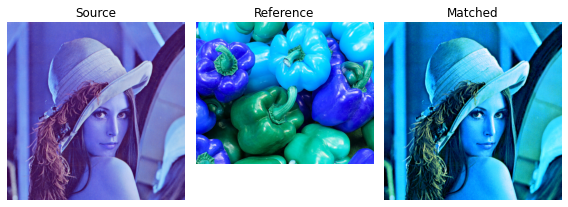

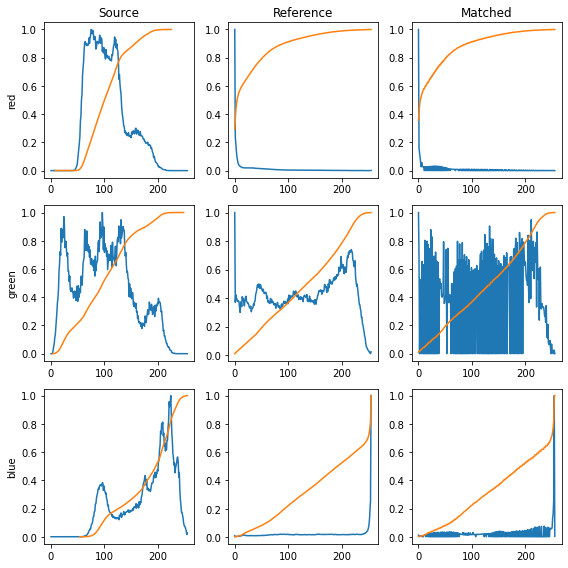

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
                                   figsize=(8, 3),
                                   sharex=True, sharey=True)

for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
    
ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
  
for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], 
                                            source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)
  
axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')
  
plt.tight_layout()
plt.show()